In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib as mpl
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')
mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
mpl.rcParams.update({'font.size': 16})
import xarray as xr

In [3]:
small_ridge = xr.open_dataset('combined_config_eigenvalues_ridgefrac03.nc')
medium_ridge = xr.open_dataset('combined_config_eigenvalues_ridgefrac05.nc')
large_ridge = xr.open_dataset('combined_config_eigenvalues_ridgefrac07.nc')


In [4]:
small_ridge_analytical = -0.0773;
medium_ridge_analytical = -0.1420;
large_ridge_analytical = -0.2230;

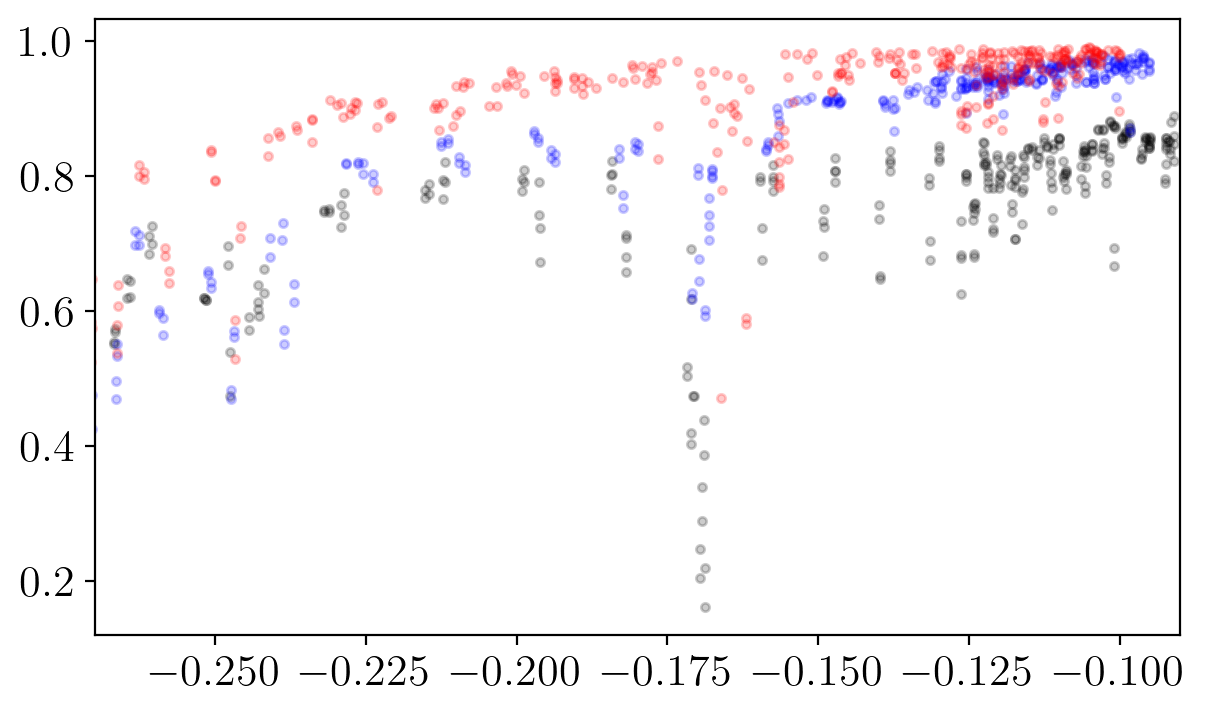

In [5]:
fig,(ax) = plt.subplots(1,1, figsize=(7,4))   
ax.plot(small_ridge.eigenvalues, small_ridge.ke_metric, 'ko', markersize=3, alpha=0.2)
ax.plot(medium_ridge.eigenvalues, medium_ridge.ke_metric, 'bo', markersize=3, alpha=0.2)
ax.plot(large_ridge.eigenvalues, large_ridge.ke_metric, 'ro', markersize=3, alpha=0.2)
ax.set_xlim(-0.27,-0.09)
# ax.axvline(-0.2230, color='k', linestyle='dashed', linewidth=0.5)
plt.show()

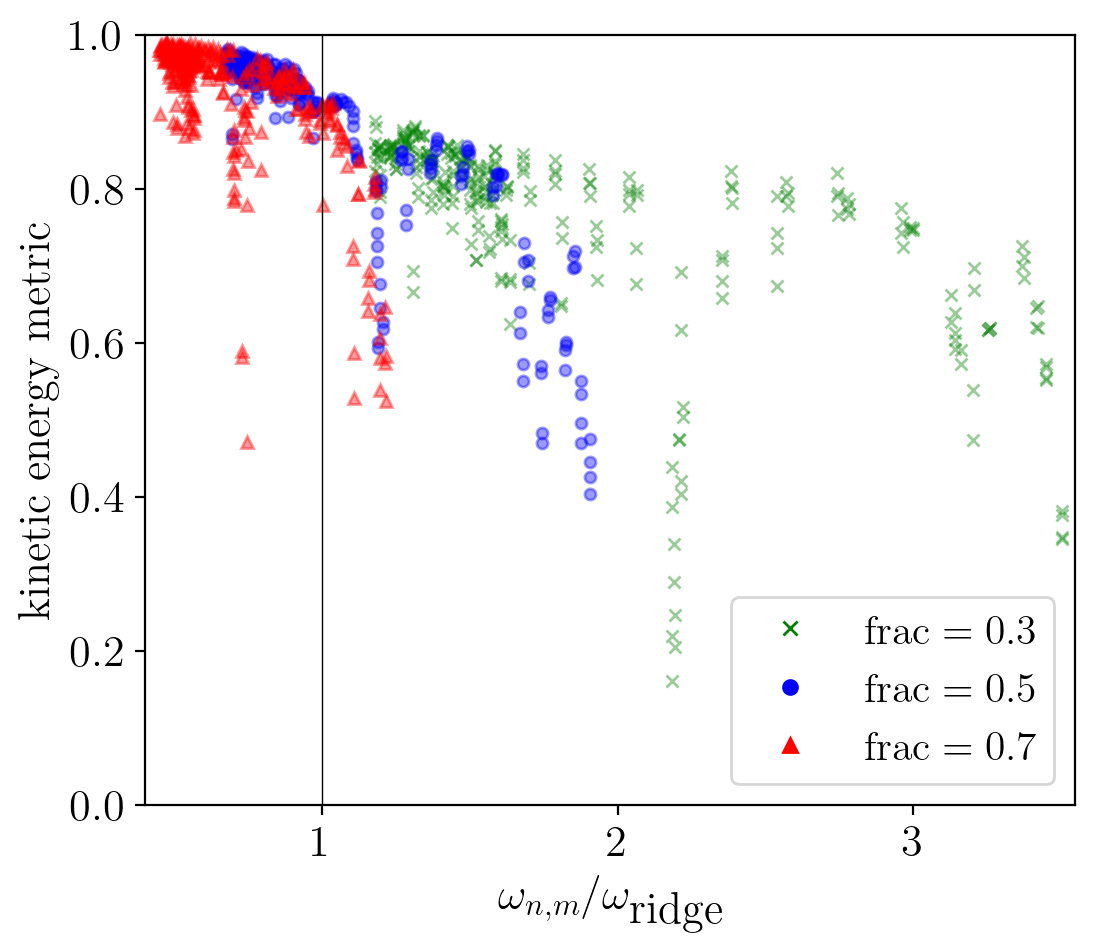

In [6]:
fig,(ax) = plt.subplots(1,1, figsize=(6,5))   
ax.plot(small_ridge.eigenvalues/small_ridge_analytical, small_ridge.ke_metric,linestyle='None', mec='g',marker='x', markersize=4, alpha=0.4, label=r'$\textrm{frac} = 0.3$')
ax.plot(medium_ridge.eigenvalues/medium_ridge_analytical, medium_ridge.ke_metric, 'bo', markersize=4, alpha=0.4, label=r'$\textrm{frac} = 0.5$')
ax.plot(large_ridge.eigenvalues/large_ridge_analytical, large_ridge.ke_metric, 'r^', markersize=4, alpha=0.4, label=r'$\textrm{frac} = 0.7$')
ax.set_xlim(0.4,3.55);ax.set_ylim(0,1)
leg=ax.legend(loc=4, fontsize=15)
for lh in leg.legendHandles:
    lh.set_alpha(1)
    lh.set_markersize(5)
ax.axvline(1, color='k', linewidth=0.5)
ax.set_xlabel(r'$\omega_{n,m} / \omega_{\textrm{ridge}}$');ax.set_ylabel(r'$\textrm{kinetic energy metric}$')
plt.show()

In [7]:
small_ridge = xr.open_dataset('alt_combined_config_eigenvalues_ridgefrac03.nc')
medium_ridge = xr.open_dataset('alt_combined_config_eigenvalues_ridgefrac05.nc')
large_ridge = xr.open_dataset('alt_combined_config_eigenvalues_ridgefrac07.nc')


In [8]:
small_ridge_analytical = -0.0773;
medium_ridge_analytical = -0.1420;
large_ridge_analytical = -0.2230;

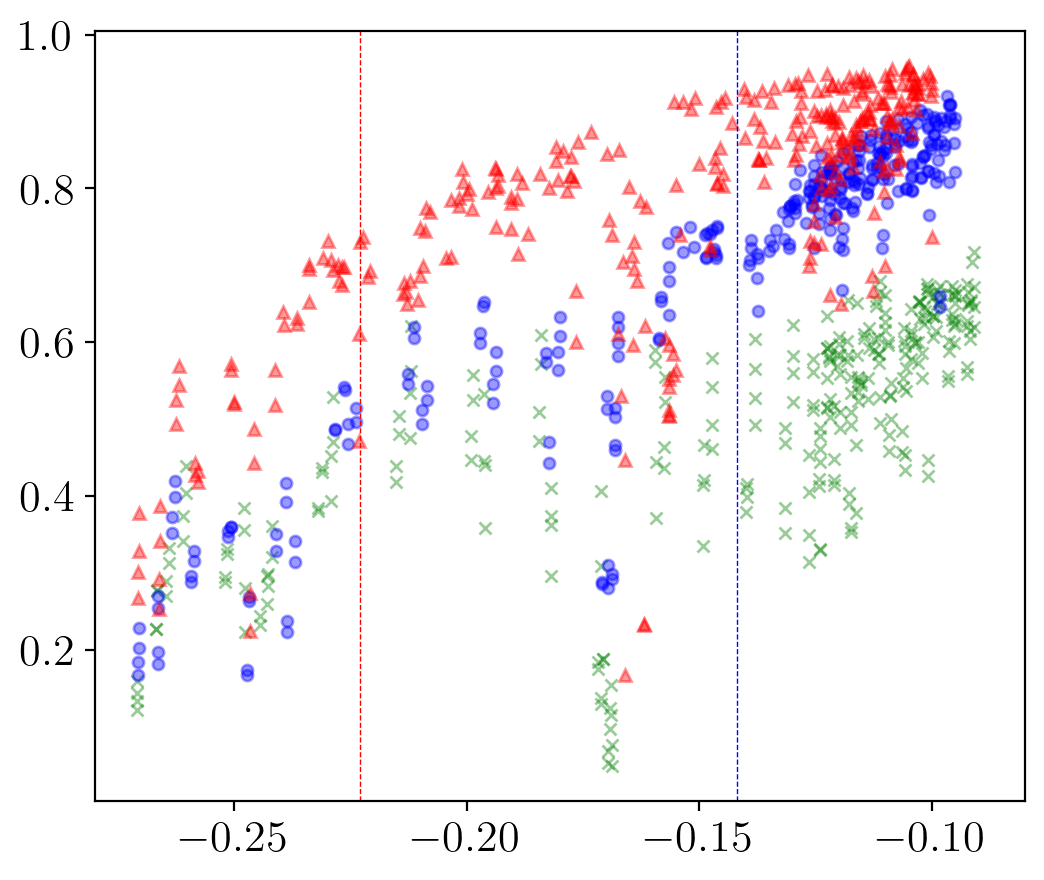

In [25]:
fig,(ax) = plt.subplots(1,1, figsize=(6,5))   
ax.plot(small_ridge.eigenvalues, small_ridge.ke_metric,linestyle='None', mec='g',marker='x', markersize=4, alpha=0.4, label=r'$\textrm{frac} = 0.3$')
ax.plot(medium_ridge.eigenvalues, medium_ridge.ke_metric, 'bo', markersize=4, alpha=0.4, label=r'$\textrm{frac} = 0.5$')
ax.plot(large_ridge.eigenvalues, large_ridge.ke_metric, 'r^', markersize=4, alpha=0.4, label=r'$\textrm{frac} = 0.7$')
ax.set_xlim(-0.28,-0.08)
ax.axvline(small_ridge_analytical, color='g', linestyle='dashed', linewidth=0.5)
ax.axvline(medium_ridge_analytical, color='b', linestyle='dashed', linewidth=0.5)
ax.axvline(large_ridge_analytical, color='r', linestyle='dashed', linewidth=0.5)
plt.show()

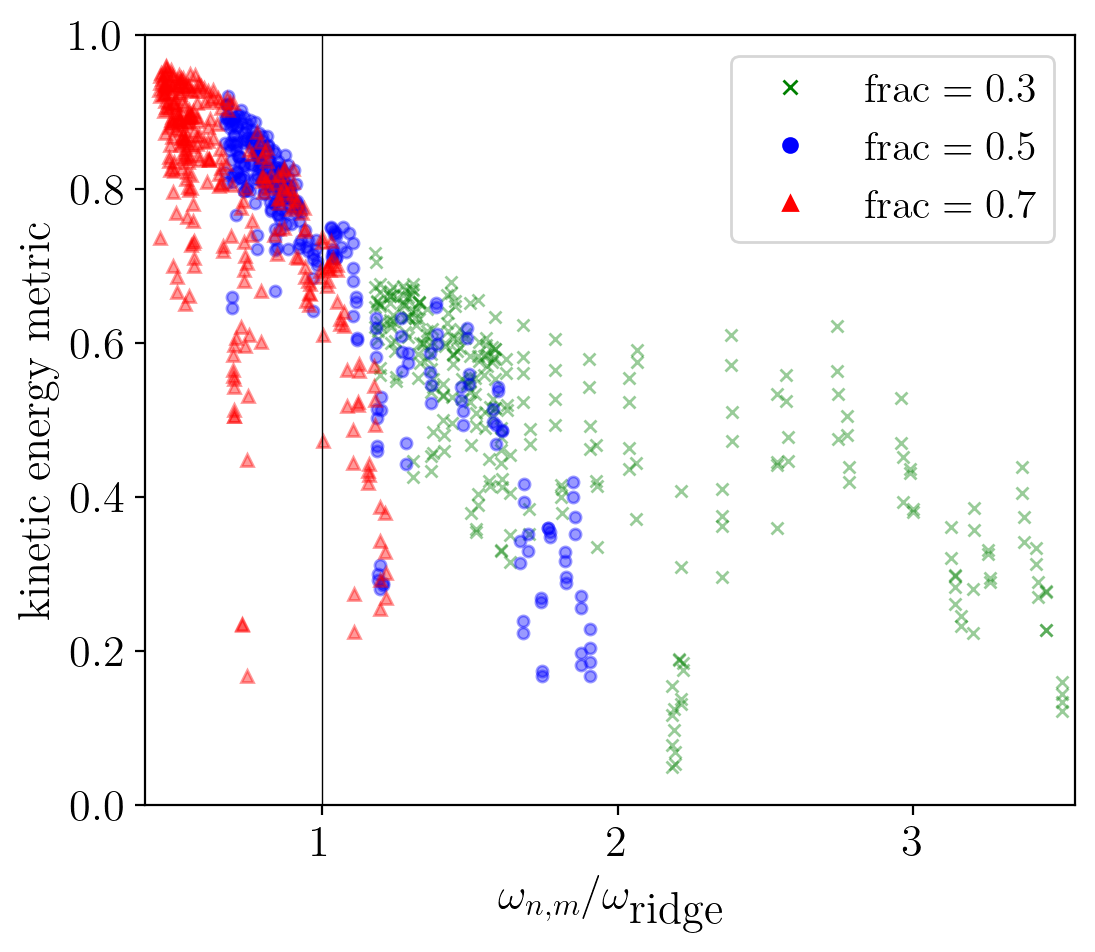

In [16]:
fig,(ax) = plt.subplots(1,1, figsize=(6,5))   
ax.plot(small_ridge.eigenvalues/small_ridge_analytical, small_ridge.ke_metric,linestyle='None', mec='g',marker='x', markersize=4, alpha=0.4, label=r'$\textrm{frac} = 0.3$')
ax.plot(medium_ridge.eigenvalues/medium_ridge_analytical, medium_ridge.ke_metric, 'bo', markersize=4, alpha=0.4, label=r'$\textrm{frac} = 0.5$')
ax.plot(large_ridge.eigenvalues/large_ridge_analytical, large_ridge.ke_metric, 'r^', markersize=4, alpha=0.4, label=r'$\textrm{frac} = 0.7$')
ax.set_xlim(0.4,3.55);ax.set_ylim(0,1)
leg=ax.legend(loc=1, fontsize=15)
for lh in leg.legendHandles:
    lh.set_alpha(1)
    lh.set_markersize(5)
# ax.axhline(1/5, color='k',linestyle='dashed', linewidth=0.5)
ax.axvline(1, color='k', linewidth=0.5)
ax.set_xlabel(r'$\omega_{n,m} / \omega_{\textrm{ridge}}$');ax.set_ylabel(r'$\textrm{kinetic energy metric}$')
plt.show()

In [36]:
small_ridge_analytical

-0.0773

In [63]:
above_small = small_ridge.ke_metric.where(np.abs(small_ridge.eigenvalues)>np.abs(small_ridge_analytical))
below_small = small_ridge.ke_metric.where(np.abs(small_ridge.eigenvalues)<np.abs(small_ridge_analytical))


In [64]:
above_medium = medium_ridge.ke_metric.where(np.abs(medium_ridge.eigenvalues)>np.abs(medium_ridge_analytical))
below_medium = medium_ridge.ke_metric.where(np.abs(medium_ridge.eigenvalues)<np.abs(medium_ridge_analytical))


In [65]:
above_large = large_ridge.ke_metric.where(np.abs(large_ridge.eigenvalues)>np.abs(large_ridge_analytical))
below_large = large_ridge.ke_metric.where(np.abs(large_ridge.eigenvalues)<np.abs(large_ridge_analytical))


In [74]:
xr.concat((above_small,above_large, above_medium), dim='n_eigenvalue').mean()

<xarray.DataArray 'ke_metric' ()>
array(0.47564066)

In [75]:
xr.concat((above_small,above_large, above_medium), dim='n_eigenvalue').std()

<xarray.DataArray 'ke_metric' ()>
array(0.16145995)

In [68]:
xr.concat(below_large, below_medium).mean()

<xarray.DataArray 'ke_metric' ()>
array(0.82315492)

In [69]:
xr.concat(below_large, below_medium).std()

<xarray.DataArray 'ke_metric' ()>
array(0.12128206)

In [62]:
print(above.mean().values)
print(above.std().values)


0.5235472837859363
0.1482749143977835


In [61]:
print(below.mean().values)
print(below.std().values)


0.8231549201363753
0.12128206326209783


In [73]:
above_small

<xarray.DataArray 'ke_metric' (n_eigenvalue: 320)>
array([0.27744987, 0.40436961, 0.22300356, 0.32030889, 0.4700196 ,
       0.56280967, 0.35887809, 0.36183152, 0.09749861, 0.04894149,
       0.52244661, 0.5424502 , 0.56522622, 0.58159358, 0.59216331,
       0.5751467 , 0.42093434, 0.55865814, 0.27745026, 0.40437202,
       0.2230045 , 0.32031116, 0.58286642, 0.58300429, 0.53575464,
       0.47002605, 0.59264535, 0.66470032, 0.62602982, 0.53061   ,
       0.60138043, 0.61486479, 0.63024121, 0.62314005, 0.63404851,
       0.649107  , 0.66098939, 0.66076905, 0.66534156, 0.67217873,
       0.22742467, 0.34169835, 0.35622902, 0.26024887, 0.39337201,
       0.47500937, 0.44528394, 0.29644688, 0.05247708, 0.11600319,
       0.43663513, 0.46184139, 0.4925723 , 0.52272221, 0.55337249,
       0.50335755, 0.41383367, 0.22742771, 0.34170312, 0.48909686,
       0.35623091, 0.26025473, 0.39337266, 0.57618264, 0.37854898,
       0.52354855, 0.52673906, 0.58423987, 0.61591619, 0.45916434,
       0.54205767, 0.57848646, 0.57331161, 0.55385087, 0.60710435,
       0.61408429, 0.62870065, 0.62393848, 0.62729333, 0.61989801,
       0.27693604, 0.43886788, 0.28058957, 0.36120579, 0.52874228,
       0.62178361, 0.44109615, 0.41010276, 0.12447802, 0.0770243 ,
       0.55440997, 0.57909601, 0.60488978, 0.62280671, 0.27693638,
       0.43887065, 0.2805912 , 0.36120862, 0.63369685, 0.59469283,
...
       0.28929808, 0.29492381, 0.24455641, 0.56965331, 0.38972622,
       0.35855976, 0.5449299 , 0.58935613, 0.58536701, 0.59606591,
       0.48436209, 0.45297191, 0.5988564 , 0.63163698, 0.42573679,
       0.64935102, 0.55556995, 0.5994413 , 0.56734965, 0.60449694,
       0.14447603, 0.31317736, 0.32523874, 0.28307124, 0.43655402,
       0.50450416, 0.55798699, 0.60988085, 0.18815231, 0.40709904,
       0.44372146, 0.46704271, 0.41538456, 0.38436879, 0.40491159,
       0.56106576, 0.48910449, 0.44430986, 0.58193151, 0.59756429,
       0.49205699, 0.55431991, 0.14447627, 0.31317588, 0.32523522,
       0.2830709 , 0.61137459, 0.65386983, 0.52928717, 0.54698476,
       0.58513475, 0.53663194, 0.65333257, 0.67603593, 0.66997893,
       0.67354934, 0.6022321 , 0.6612495 , 0.6508996 , 0.65295373,
       0.12186457, 0.26998112, 0.28878495, 0.23251833, 0.38411475,
       0.43882578, 0.47773145, 0.50991127, 0.18386433, 0.13030674,
       0.5902617 , 0.41397306, 0.4104711 , 0.48866147, 0.31484765,
       0.51254662, 0.42290873, 0.33115029, 0.51568451, 0.583758  ,
       0.12186466, 0.26998398, 0.40415239, 0.35399748, 0.28878195,
       0.23251945, 0.54817118, 0.60466154, 0.57258896, 0.60008061,
       0.45676646, 0.43402459, 0.59988802, 0.64056428, 0.44667266,
       0.65314201, 0.54982369, 0.62056835, 0.55811426, 0.6152351 ])
Coordinates:
  * n_eigenvalue  (n_eigenvalue) int32 0 1 2 3 4 5 6 ... 314 315 316 317 318 319
    case          (n_eigenvalue) float64 1.0 1.0 1.0 1.0 1.0 ... 8.0 8.0 8.0 8.0